# Importing Libraries

In [1]:
import torch
import torch.nn as nn
from torch.optim import adam,lr_scheduler   # Adam optimizer and learning rate scheduler


In [2]:
# Evalution metrics, vizualization, and data preprocessing libraries

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
# Warnings Library
import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

# Data Loading and Handling

In [4]:
df = pd.read_csv(r"E:\vs_code_dsa\ANN\Industrial Residential Air Quality Classification\City_Types.csv",encoding='utf-8')
df

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,2024-01-01 00:00:00+00:00,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,2024-01-01 01:00:00+00:00,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,2024-01-01 02:00:00+00:00,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,2024-01-01 03:00:00+00:00,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,2024-01-01 04:00:00+00:00,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,Industrial
...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Stockholm,211.0,20.5,1.1,54.0,4.6,10.6,Residential
52700,2024-12-31 20:00:00+00:00,Stockholm,183.0,10.0,0.6,64.0,2.5,6.0,Residential
52701,2024-12-31 21:00:00+00:00,Stockholm,167.0,5.1,0.4,72.0,2.0,4.4,Residential
52702,2024-12-31 22:00:00+00:00,Stockholm,160.0,3.9,0.3,73.0,1.4,2.6,Residential


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   Type    52704 non-null  object 
dtypes: float64(6), object(3)
memory usage: 3.6+ MB


In [6]:
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,508.030472,29.616492,22.387250,53.423668,32.931045,50.644980
std,692.274824,23.984409,34.285823,42.225556,43.833691,67.311502
min,0.000000,0.900000,0.000000,0.000000,0.300000,0.400000
25%,187.000000,11.000000,0.700000,26.000000,6.400000,9.400000
50%,268.000000,23.300000,10.500000,48.000000,14.800000,19.800000
75%,519.000000,42.200000,30.200000,69.000000,42.600000,68.350000
max,12876.000000,218.000000,497.800000,342.000000,459.100000,661.200000


In [7]:
df.isna().sum()  #No missing values

Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
Type     0
dtype: int64

# Data Vizualization

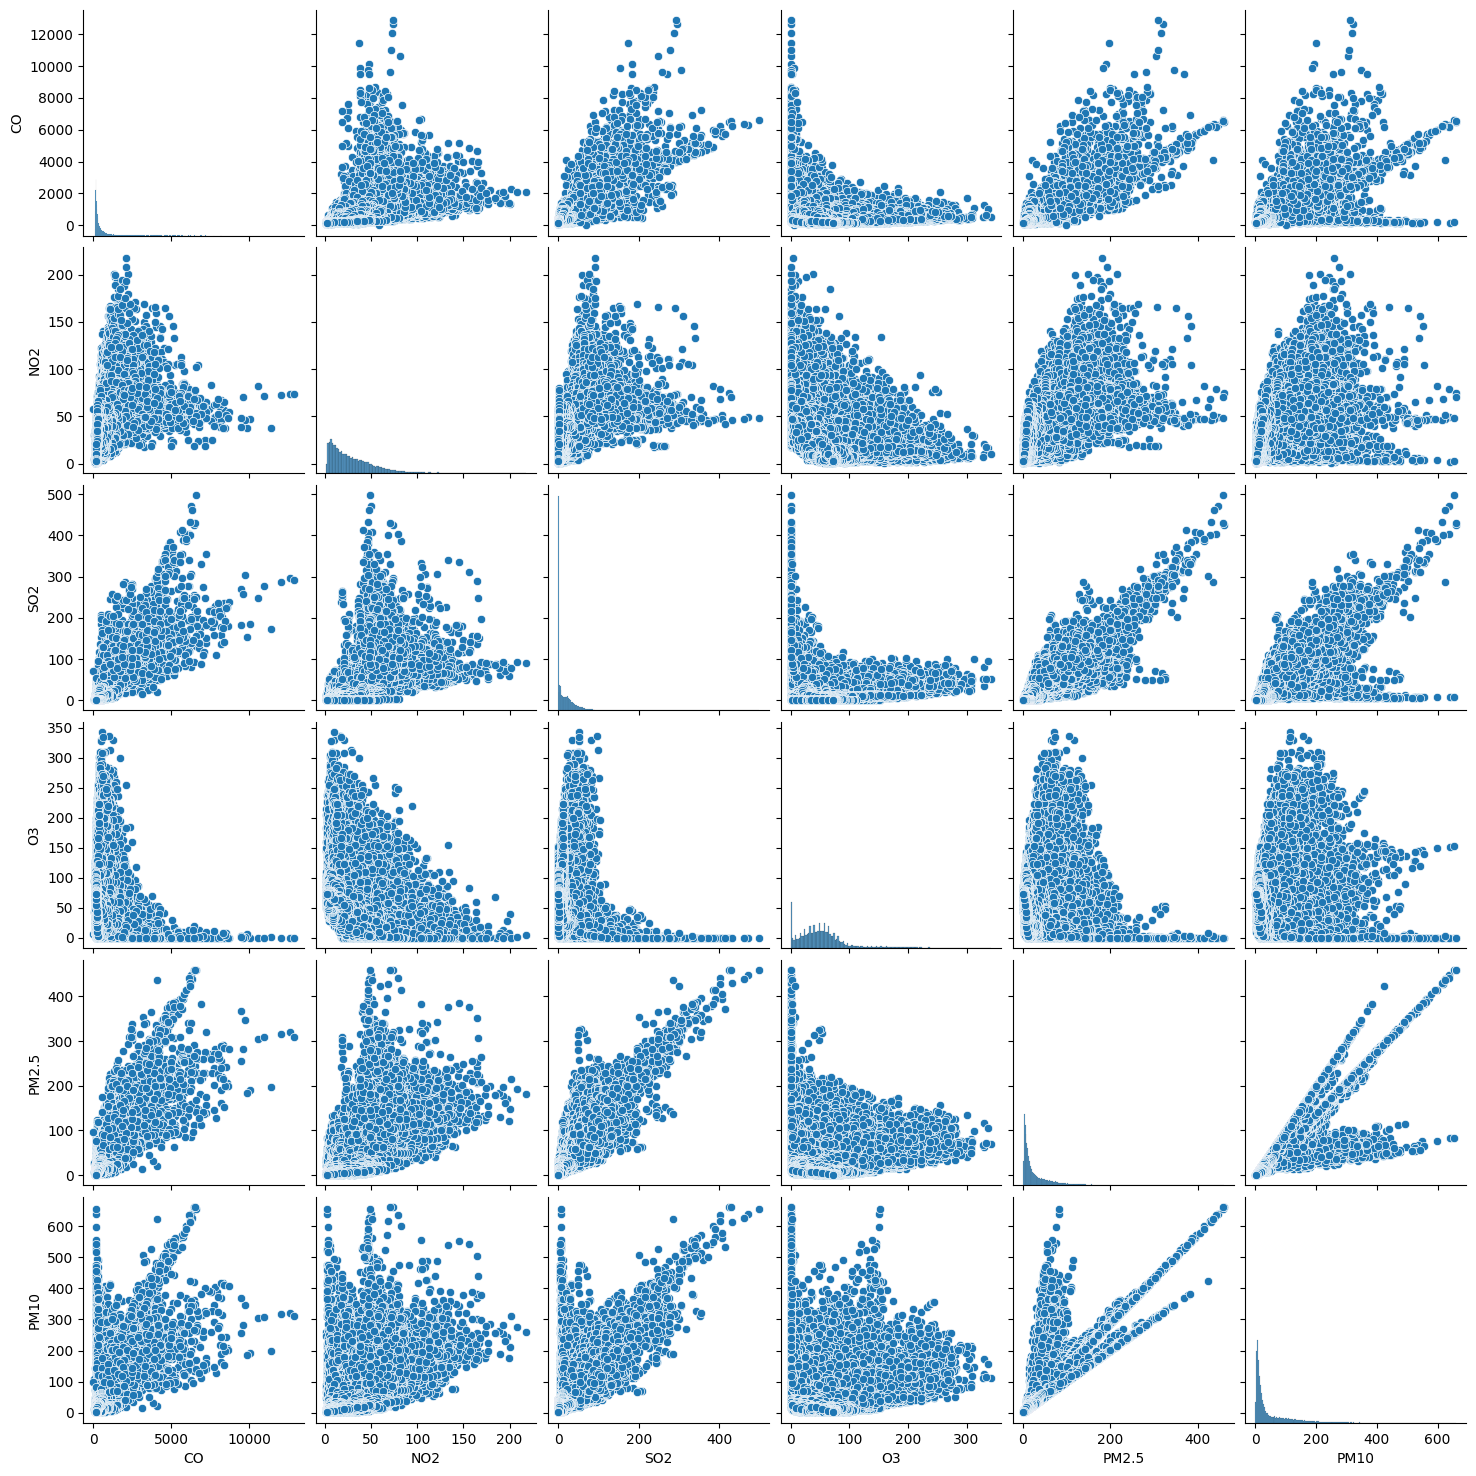

In [8]:
sns.pairplot(df)
plt.show()

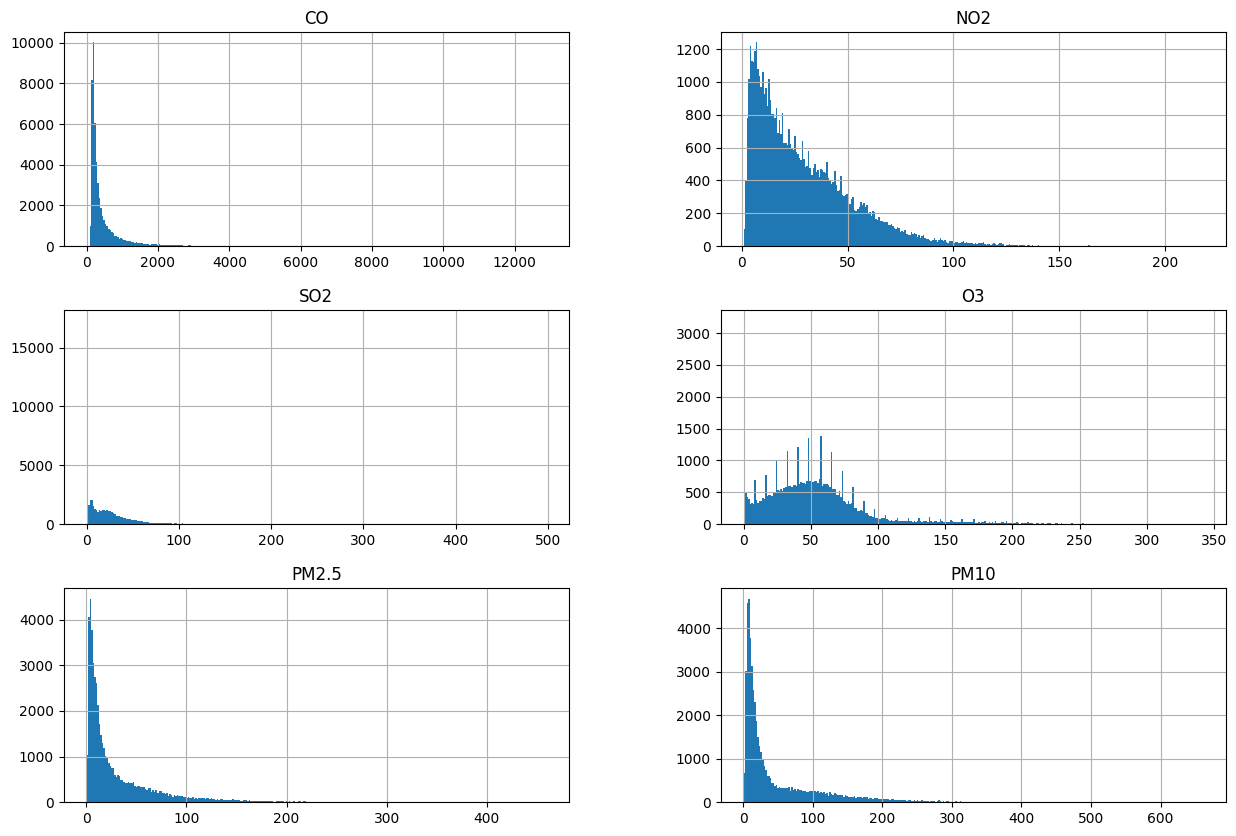

In [9]:
# Plotting Histograms for each Numeriacal feature

df.select_dtypes(include=['float64', 'int64']).hist(bins=300, figsize=(15, 10))
plt.show()

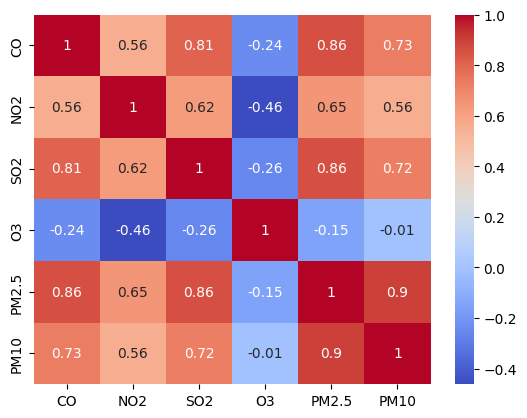

In [10]:
# Dropping unnecessary columns
sns.heatmap(df.drop(columns=['Date','City','Type'],axis=1).corr(), annot=True, cmap='coolwarm')
plt.show()

# There is more than decent correlation among all the features, so we don't need to drop any features.

In [11]:
np.unique(df.City,return_counts=True)

(array(['Beijing', 'Delhi', 'Moscow', 'Stockholm', 'Vancouver', 'Zurich'],
       dtype=object),
 array([8784, 8784, 8784, 8784, 8784, 8784]))

In [12]:
np.unique(df.Type,return_counts = True)

(array(['Industrial', 'Residential'], dtype=object), array([26352, 26352]))

In [13]:
Label_encoder_type  = LabelEncoder()
df.Type = Label_encoder_type.fit(df['Type']).transform(df['Type'])
df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,2024-01-01 00:00:00+00:00,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,0
1,2024-01-01 01:00:00+00:00,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,0
2,2024-01-01 02:00:00+00:00,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,0
3,2024-01-01 03:00:00+00:00,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,0
4,2024-01-01 04:00:00+00:00,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,0


In [14]:
# How to see which numbers are mapped to which classes? It follows serialization, so 1st name in classes is associated with 0 followed by 1,2,3,...len(classes_)
Label_encoder_type.classes_  # To see the classes of the label encoder

array(['Industrial', 'Residential'], dtype=object)

In [15]:
# In order to convert City into one hot encoding, we can use pandas.get_dummies or we can use ohe(one hot encoder)
from sklearn.preprocessing import OneHotEncoder

ohe_city =  OneHotEncoder()
df_city  = ohe_city.fit_transform(np.reshape(df.City,shape=(-1,1)))  #we are doing this since ohe takes 2d array as input!
df_city

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52704 stored elements and shape (52704, 6)>

In [16]:
df_city.toarray()  # We got a array of size(input_length * No.of columns)

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [17]:
ohe_city.get_feature_names_out(['city'])   # whatever is typed inside is considered a , default is x0_

array(['city_Beijing', 'city_Delhi', 'city_Moscow', 'city_Stockholm',
       'city_Vancouver', 'city_Zurich'], dtype=object)

In [18]:
df_city =  pd.DataFrame(df_city.toarray(),columns= ohe_city.get_feature_names_out(['city']))
df_city

,city_Beijing,city_Delhi,city_Moscow,city_Stockholm,city_Vancouver,city_Zurich
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
52699,0.0,0.0,0.0,1.0,0.0,0.0
52700,0.0,0.0,0.0,1.0,0.0,0.0
52701,0.0,0.0,0.0,1.0,0.0,0.0
52702,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
df_final = df.drop(['Date','City'],axis=1).merge(df_city,left_index=True,right_index=True)
df_final.head()

,CO,NO2,SO2,O3,PM2.5,PM10,Type,city_Beijing,city_Delhi,city_Moscow,city_Stockholm,city_Vancouver,city_Zurich
0,208.0,15.9,13.2,44.0,8.6,9.4,0,0.0,0.0,1.0,0.0,0.0,0.0
1,207.0,17.4,13.7,44.0,8.6,10.5,0,0.0,0.0,1.0,0.0,0.0,0.0
2,217.0,19.0,15.5,43.0,10.4,12.9,0,0.0,0.0,1.0,0.0,0.0,0.0
3,231.0,21.0,20.7,36.0,12.3,15.3,0,0.0,0.0,1.0,0.0,0.0,0.0
4,263.0,34.5,27.2,27.0,13.6,20.0,0,0.0,0.0,1.0,0.0,0.0,0.0


# Data Splitting into x,y

In [20]:
y = df['Type']
print(y,y.shape)

x = df_final.drop('Type',axis=1)
x

0        0
1        0
2        0
3        0
4        0
        ..
52699    1
52700    1
52701    1
52702    1
52703    1
Name: Type, Length: 52704, dtype: int64 (52704,)


,CO,NO2,SO2,O3,PM2.5,PM10,city_Beijing,city_Delhi,city_Moscow,city_Stockholm,city_Vancouver,city_Zurich
0,208.0,15.9,13.2,44.0,8.6,9.4,0.0,0.0,1.0,0.0,0.0,0.0
1,207.0,17.4,13.7,44.0,8.6,10.5,0.0,0.0,1.0,0.0,0.0,0.0
2,217.0,19.0,15.5,43.0,10.4,12.9,0.0,0.0,1.0,0.0,0.0,0.0
3,231.0,21.0,20.7,36.0,12.3,15.3,0.0,0.0,1.0,0.0,0.0,0.0
4,263.0,34.5,27.2,27.0,13.6,20.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52699,211.0,20.5,1.1,54.0,4.6,10.6,0.0,0.0,0.0,1.0,0.0,0.0
52700,183.0,10.0,0.6,64.0,2.5,6.0,0.0,0.0,0.0,1.0,0.0,0.0
52701,167.0,5.1,0.4,72.0,2.0,4.4,0.0,0.0,0.0,1.0,0.0,0.0
52702,160.0,3.9,0.3,73.0,1.4,2.6,0.0,0.0,0.0,1.0,0.0,0.0


# Splitting data into test train split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42,shuffle=True)
print(x_train,y_train)
print(len(x_train),len(y_train))

           CO    NO2   SO2    O3  PM2.5   PM10  city_Beijing  city_Delhi  \
12119   384.0   22.8  12.4  47.0   66.6  202.1           0.0         1.0   
37351   431.0   57.1  15.0   5.0   21.4   31.7           0.0         0.0   
22701  1193.0  101.3  52.8   0.0  137.8  197.4           1.0         0.0   
48779   145.0    5.1   0.3  73.0    4.7    5.7           0.0         0.0   
19566   464.0   39.7  25.9  44.0   37.1   58.2           1.0         0.0   
...       ...    ...   ...   ...    ...    ...           ...         ...   
11284   589.0   26.8  22.3  92.0   80.6  193.7           0.0         1.0   
44732   164.0    3.1   0.2  75.0    1.9    4.2           0.0         0.0   
38158   171.0    9.8   3.6  68.0    9.0   13.2           0.0         0.0   
860     507.0   66.2  46.4  12.0   35.0   42.7           0.0         0.0   
15795  1622.0   64.2  39.5  78.0  108.3  168.1           0.0         1.0   

       city_Moscow  city_Stockholm  city_Vancouver  city_Zurich  
12119          0.0   

# Standardization

In [22]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)
print(x_train,x_test)
print(y_train,y_test)

[[-1.80666449e-01 -2.85860585e-01 -2.90368427e-01 ... -4.48163635e-01
  -4.50146397e-01 -4.43985188e-01]
 [-1.12392139e-01  1.13047569e+00 -2.14969632e-01 ... -4.48163635e-01
   2.22149951e+00 -4.43985188e-01]
 [ 9.94523264e-01  2.95560873e+00  8.81212841e-01 ... -4.48163635e-01
  -4.50146397e-01 -4.43985188e-01]
 ...
 [-4.90079810e-01 -8.22664421e-01 -5.45564346e-01 ... -4.48163635e-01
   2.22149951e+00 -4.43985188e-01]
 [-1.99112769e-03  1.50623837e+00  6.95615809e-01 ... -4.48163635e-01
  -4.50146397e-01 -4.43985188e-01]
 [ 1.61770792e+00  1.42365317e+00  4.95519008e-01 ... -4.48163635e-01
  -4.50146397e-01 -4.43985188e-01]] [[-0.50502099 -1.00964477 -0.65169306 ... -0.44578732 -0.44280242
   2.21218573]
 [-0.30445675 -0.18862435 -0.62815437 ... -0.44578732 -0.44280242
   2.21218573]
 [ 1.12098197  1.59730667  0.4575678  ... -0.44578732 -0.44280242
  -0.45204161]
 ...
 [-0.30445675  0.03990711  0.44579845 ... -0.44578732 -0.44280242
  -0.45204161]
 [-0.41333448 -0.28172976  0.078006

# Our Data Splits are ready! Normally these can be used on Models directly but we use Data Loaders and torch tensors if we are using Pytorch!

In [23]:
# Torch imports

import torch 
import torch.nn as nn
from torch.optim import lr_scheduler,adam
from torch.utils.data import TensorDataset,DataLoader

# Creating Torch Tensors insted of arrays 
#### (similar to array but pytorch works only with tensors!)

In [24]:
y_train.shape

(31622,)

In [25]:
x_train_tensor = torch.tensor(x_train,dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(),dtype = torch.float32)

x_test_tensor = torch.tensor(x_test,dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(),dtype = torch.float32)


#  Create TensorDataset and DataLoader

In [26]:
# we are wrapping the tensors into a dataset(clubbing them together and passing slices of the dataset to model with shuffling each row for better generalization)
train_ds = TensorDataset(x_train_tensor,y_train_tensor)
test_ds  = TensorDataset(x_test_tensor,y_test_tensor)

train_ds.tensors  # How to see the Dataset values?

(tensor([[-1.8067e-01, -2.8586e-01, -2.9037e-01,  ..., -4.4816e-01,
          -4.5015e-01, -4.4399e-01],
         [-1.1239e-01,  1.1305e+00, -2.1497e-01,  ..., -4.4816e-01,
           2.2215e+00, -4.4399e-01],
         [ 9.9452e-01,  2.9556e+00,  8.8121e-01,  ..., -4.4816e-01,
          -4.5015e-01, -4.4399e-01],
         ...,
         [-4.9008e-01, -8.2266e-01, -5.4556e-01,  ..., -4.4816e-01,
           2.2215e+00, -4.4399e-01],
         [-1.9911e-03,  1.5062e+00,  6.9562e-01,  ..., -4.4816e-01,
          -4.5015e-01, -4.4399e-01],
         [ 1.6177e+00,  1.4237e+00,  4.9552e-01,  ..., -4.4816e-01,
          -4.5015e-01, -4.4399e-01]]),
 tensor([0., 1., 0.,  ..., 1., 0., 0.]))

In [27]:
# Loader help to break the clubbed tensors(Dataset) to batches and shuffle the inputs when training the data 

train_loader  = DataLoader(train_ds,shuffle=True,batch_size=128)
test_loader = DataLoader(test_ds,shuffle = True,batch_size=128)


In [28]:
# How to see/iterate over a train_loader?
#what's happening is the Dataset is broken down to len(train_ds)/batch_size = 330)!
var = 0
for i in train_loader:
    var+=1
    print(var)
    print(i)
    print('*'*120)


1
[tensor([[-0.5293, -0.5832, -0.6326,  ...,  2.2313, -0.4501, -0.4440],
        [ 0.2377,  0.6804,  1.7628,  ..., -0.4482, -0.4501, -0.4440],
        [-0.2431,  0.9199,  0.2345,  ..., -0.4482, -0.4501, -0.4440],
        ...,
        [-0.0891,  0.3500,  0.0692,  ..., -0.4482, -0.4501, -0.4440],
        [-0.1661,  0.4904, -0.4267,  ..., -0.4482,  2.2215, -0.4440],
        [-0.4145,  0.1766, -0.5920,  ..., -0.4482,  2.2215, -0.4440]]), tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
  

In [29]:
330*128


42240

In [30]:
len(x_train)

31622

In [31]:
x

,CO,NO2,SO2,O3,PM2.5,PM10,city_Beijing,city_Delhi,city_Moscow,city_Stockholm,city_Vancouver,city_Zurich
0,208.0,15.9,13.2,44.0,8.6,9.4,0.0,0.0,1.0,0.0,0.0,0.0
1,207.0,17.4,13.7,44.0,8.6,10.5,0.0,0.0,1.0,0.0,0.0,0.0
2,217.0,19.0,15.5,43.0,10.4,12.9,0.0,0.0,1.0,0.0,0.0,0.0
3,231.0,21.0,20.7,36.0,12.3,15.3,0.0,0.0,1.0,0.0,0.0,0.0
4,263.0,34.5,27.2,27.0,13.6,20.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52699,211.0,20.5,1.1,54.0,4.6,10.6,0.0,0.0,0.0,1.0,0.0,0.0
52700,183.0,10.0,0.6,64.0,2.5,6.0,0.0,0.0,0.0,1.0,0.0,0.0
52701,167.0,5.1,0.4,72.0,2.0,4.4,0.0,0.0,0.0,1.0,0.0,0.0
52702,160.0,3.9,0.3,73.0,1.4,2.6,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
x_train.shape

(31622, 12)

In [33]:
y_train.shape

(31622,)

In [34]:
# My ANN Model in class implementation

# Basic methodology in pytorch differes from Tensorflow
# Here we have nn.sequential models but still as a sign of progress and ability to tweak little things in pytorch i'm writting a class, this will be super helpfun and handy when working with advanced projects like llm'scalar


class binary_nn(nn.Module):
    def __init__(self, input_size):
        super(binary_nn,self).__init__()
        
        # Our NN Architecture!
        # __init__ has all initiallized parameters in it when we define an object of a class binary_nn
        
        self.hidden_layer1 = nn.Linear(input_size,32)  # our first hidden layer which is a Fully connected or FC layer
        self.hidden_layer2 = nn.Linear(32,16)   #our 2nd FC layer 
        self.hidden_layer3 = nn.Linear(16,8)   # our 3rd FC layer (We can just go ahed with 2 layers which is fine but if your data has patters to learn then more layers capture more patters)
        self.output_layer =  nn.Linear(8,1)    # our 4th FC layer 
        
        # Defining Activation Functions!
        self.relu_activation = nn.ReLU()  # x===> f(x)
        self.sigmoid_activation = nn.Sigmoid()  # Applies sigmoid function to input 
        self.dropout = nn.Dropout(0.3)  #Using Dropouts to prevent overfitting!
        
    def forward(self,x):
        x = self.hidden_layer1(x)
        x = self.relu_activation(x)
        x = self.dropout(x)

        
        x = self.hidden_layer2(x)
        x = self.relu_activation(x)
        x = self.dropout(x)

        
        x = self.hidden_layer3(x)
        x = self.relu_activation(x)
        x = self.dropout(x)

        
        x = self.output_layer(x)
        x = self.sigmoid_activation(x)
        
        return x
    
model = binary_nn(x_train_tensor.shape[1])

In [35]:
model.parameters

<bound method Module.parameters of binary_nn(
  (hidden_layer1): Linear(in_features=12, out_features=32, bias=True)
  (hidden_layer2): Linear(in_features=32, out_features=16, bias=True)
  (hidden_layer3): Linear(in_features=16, out_features=8, bias=True)
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
  (relu_activation): ReLU()
  (sigmoid_activation): Sigmoid()
  (dropout): Dropout(p=0.3, inplace=False)
)>

# Training and Testing Loops

In [36]:
from torch.optim import Adam

learning_rate  = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"This NN is run using : {device}")

model.to(device)
criterion = nn.BCELoss()
optimizer  = Adam(model.parameters(),lr=learning_rate)
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)


training_acc_lst = []
testing_acc_lst = []

training_loss_lst = []
testing_loss_lst = []
num_epochs = 100
max_loss = float('inf')
counter = 0

# Epoch Loop 
for epoch in range(num_epochs):
    # Training Loop
    model.train()   #setting Training 
    running_train_loss = 0
    actual_outputs_train_lst =[]
    predicted_outputs_train_lst = []    # we want to club our batch outputs and calculate accuracy!
    
    for x,y in train_loader:
        # print(x,y)
        # print('*'*200)
        x = x.to(device)
        y = y.to(device).view(-1, 1).float()

        optimizer.zero_grad()
        
        # Model prediction
        y_predicted = model(x)
        # print(x,x.shape)
        # print(y,y.shape)
        # print(y_predicted,y_predicted.shape)
        
        loss = criterion(y_predicted,y)
        loss.backward()   #After one prediction of training data do back propogation which is done by loss and optimizer 
        optimizer.step()
        
        running_train_loss += loss.item()  #We are summing the loss because we have split the input into batch size, we want total loss for each epoch!
        y_predicted = (y_predicted >0.5).float()  #sigmoid outputs probabilities, we are converting it to o and 1's
        actual_outputs_train_lst.extend(y.cpu().numpy())
        predicted_outputs_train_lst.extend(y_predicted.cpu().numpy())
        
    accuracy_train = accuracy_score(actual_outputs_train_lst,predicted_outputs_train_lst)
    train_loss = running_train_loss/len(train_loader)  #we calculate Avg loss of all loaders in an epoch, we don't add them, we avg them
    training_loss_lst.append(train_loss)        #Save this avg loss in a lst, later used for vizualization!
    training_acc_lst.append(accuracy_train)
    # Training is done!
    
    
    
    
    #Evaluation Loop:
    model.eval() # setting the model to eval mode!
    with torch.no_grad():
        running_test_loss = 0
        actual_outputs_test_lst =[]
        predicted_outputs_test_lst = []    # we want to club our batch outputs and calculate accuracy!
        
        for x,y in test_loader:
            x = x.to(device)
            y = y.to(device).view(-1, 1).float()

            
            #Model prediction on test data
            y_predicted = model(x)
            loss = criterion(y_predicted,y)
            running_test_loss += loss.item()
            y_predicted = (y_predicted >0.5).float()
            
            actual_outputs_test_lst.extend(y.cpu().numpy())
            predicted_outputs_test_lst.extend(y_predicted.cpu().numpy())
        
        accuracy_test = accuracy_score(actual_outputs_test_lst,predicted_outputs_test_lst)
        test_loss = running_test_loss/len(test_loader)
        testing_loss_lst.append(test_loss)
        testing_acc_lst.append(accuracy_test)
        
        # Feeding test_loss to scheduler
        scheduler.step(test_loss)
    
    # Implementing Early stopping
    if test_loss < max_loss:
        # This means there is improvement in this epoch, Test loss decreased!
        # what we do is we reset the counter!
        max_loss = test_loss
        counter = 0
        # when ever we find an improvement, we save the model weights i.e the model.pth
        torch.save(model.state_dict(),'AQ_prediction.pth')
    else:
        counter +=1
        if counter >= 10:  # Stop after 10 no improvement epochs
            print(f'Test loss remained the same or worse for the last {counter} epochs! ')
            print(f'Early stopping after {epoch} epochs.')
            break
    
    
    
    print(f"Epoch :{epoch} of {num_epochs}")
    print('_'*50)
    print(f'Training loss     : {train_loss:.4f}')
    print(f"Testing loss      : {test_loss:.4f}")
    print()
    print(f"Training Accuracy : {accuracy_train:.4f}")
    print(f"Testing Accuracy  : {accuracy_test:.4f}")
    print('_'*50)
    
        
        
    

            
        
    
    
        
    
        
        
    


This NN is run using : cuda
Epoch :0 of 100
__________________________________________________
Training loss     : 0.2770
Testing loss      : 0.0017

Training Accuracy : 0.8508
Testing Accuracy  : 1.0000
__________________________________________________
Epoch :1 of 100
__________________________________________________
Training loss     : 0.0374
Testing loss      : 0.0000

Training Accuracy : 0.9978
Testing Accuracy  : 1.0000
__________________________________________________
Epoch :2 of 100
__________________________________________________
Training loss     : 0.0295
Testing loss      : 0.0000

Training Accuracy : 0.9991
Testing Accuracy  : 1.0000
__________________________________________________
Epoch :3 of 100
__________________________________________________
Training loss     : 0.0271
Testing loss      : 0.0000

Training Accuracy : 0.9995
Testing Accuracy  : 1.0000
__________________________________________________
Epoch :4 of 100
________________________________________________

### This is invalid for tensors: why beacsue you are dealing with tensors and not scalars!
### y_predicted = 0 if y_predicted < 0.5 else 1

### That's why use 
### y_predicted = (y_predicted > 0.5).float()    This returns a booleans whether it's True or False, and we later convert the true values to float and False values to Zero


In [37]:
0<0

False